In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [84]:
def get_new_array(array):

    # Shape: (112, 86400)
    # Every seventh row (0, 7, 14, etc) is empty (between animals)
    # Rows correspond to animals x days
    # Rows contain 0s, nans, and a number from 6 to 1 (depending on the row)
    # The order is inverted (so it goes from P30 to P15, and from pup4 (#6) to adult female (#1))
    # Columns correspond to seconds in 24 hours
    
    # Dropping every 7th row to get rid of empty rows between days
    # New shape: (96, 86400)
    new_array = np.delete(array, np.arange(0, len(array), 7), axis = 0)
    
    # New array with number of seconds that each animal spends in the waterspout region
    final_array = np.zeros((6, 16))
    
    for animal_index in range(6):
        for index in range(animal_index, new_array.shape[0], 6):
            animal_data = new_array[index, :]
            final_array[animal_index, index // 6] = np.where(animal_data == np.unique(animal_data)[1])[0].shape[0]
    
    final_array = np.flip(final_array, axis=0)
    final_array = np.flip(final_array, axis=1)


    return final_array

In [105]:
water_c2 = np.load('/Users/lisadiez/Downloads/cohort2_waterspout.npy')
water_c2_final = get_new_array(water_c2)

water_c3 = np.load('/Users/lisadiez/Downloads/cohort3_waterspout.npy')
water_c3_final = get_new_array(water_c3)

water_c4 = np.load('/Users/lisadiez/Downloads/cohort4_waterspout.npy')
water_c4_final = get_new_array(water_c4)

In [ ]:
# One of the arrays had a different shape so I had to fix it

# reshaped_array = np.transpose(water_c3)

# new_data = np.full((112, 86400), np.nan)

# for i in range(96):
#     new_index = i + (i // 6) + 1
#     new_data[new_index] = reshaped_array[i]

# np.save('/Users/lisadiez/Downloads/new_cohort3_waterspout.npy', new_data)

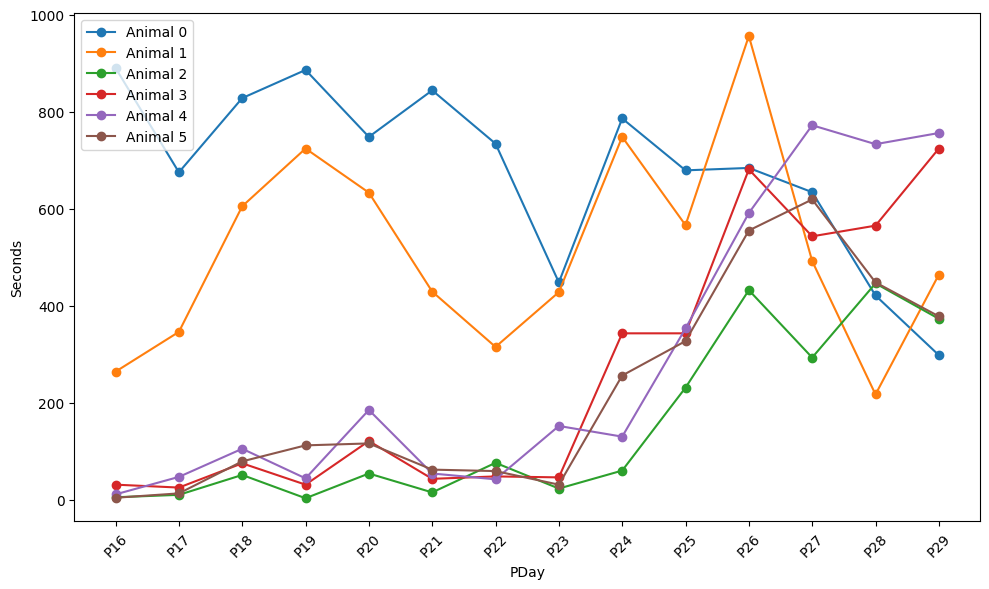

In [107]:
# Plotting to make sure data is ok

data_array = water_c4_final[:, 1:15]

# Number of animals and days
num_animals, num_days = data_array.shape

# Generate the x-axis labels (e.g., P15, P16, ..., P30)
days = [f'P{16 + i}' for i in range(num_days)]

# Plot each animal's data as a separate line
plt.figure(figsize=(10, 6))

for animal in range(num_animals):
    plt.plot(days, data_array[animal, :], marker='o', label=f'Animal {animal}')

# Add labels and title
plt.xlabel('PDay')
plt.ylabel('Seconds')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [131]:
def get_relative_arrays(array_c2, array_c3, array_c4):
    
    c2 = array_c2[2:, 1:15] / np.mean(np.mean(array_c2[:2, 1:15], axis = 0))
    c3 = array_c3[2:, 1:15] / np.mean(np.mean(array_c3[:2, 1:15], axis = 0))
    c4 = array_c4[2:, 1:15] / np.mean(np.mean(array_c4[:2, 1:15], axis = 0))
    
    mean = np.mean(np.vstack((c2, c3, c4)), axis = 0)
    std = np.std(np.vstack((c2, c3, c4)), axis = 0)
    sem = stats.sem(np.vstack((c2, c3, c4)), axis = 0)

    return mean, std, sem

In [132]:
mean, std, sem = get_relative_arrays(water_c2_final, water_c3_final, water_c4_final)

In [133]:
shuffled_water_c2 = water_c2_final.copy()
np.random.shuffle(shuffled_water_c2)

shuffled_water_c3 = water_c3_final.copy()
np.random.shuffle(shuffled_water_c3)

shuffled_water_c4 = water_c4_final.copy()
np.random.shuffle(shuffled_water_c4)

shuffled_mean, shuffled_std, shuffled_sem = get_relative_arrays(shuffled_water_c2, shuffled_water_c3, shuffled_water_c4)

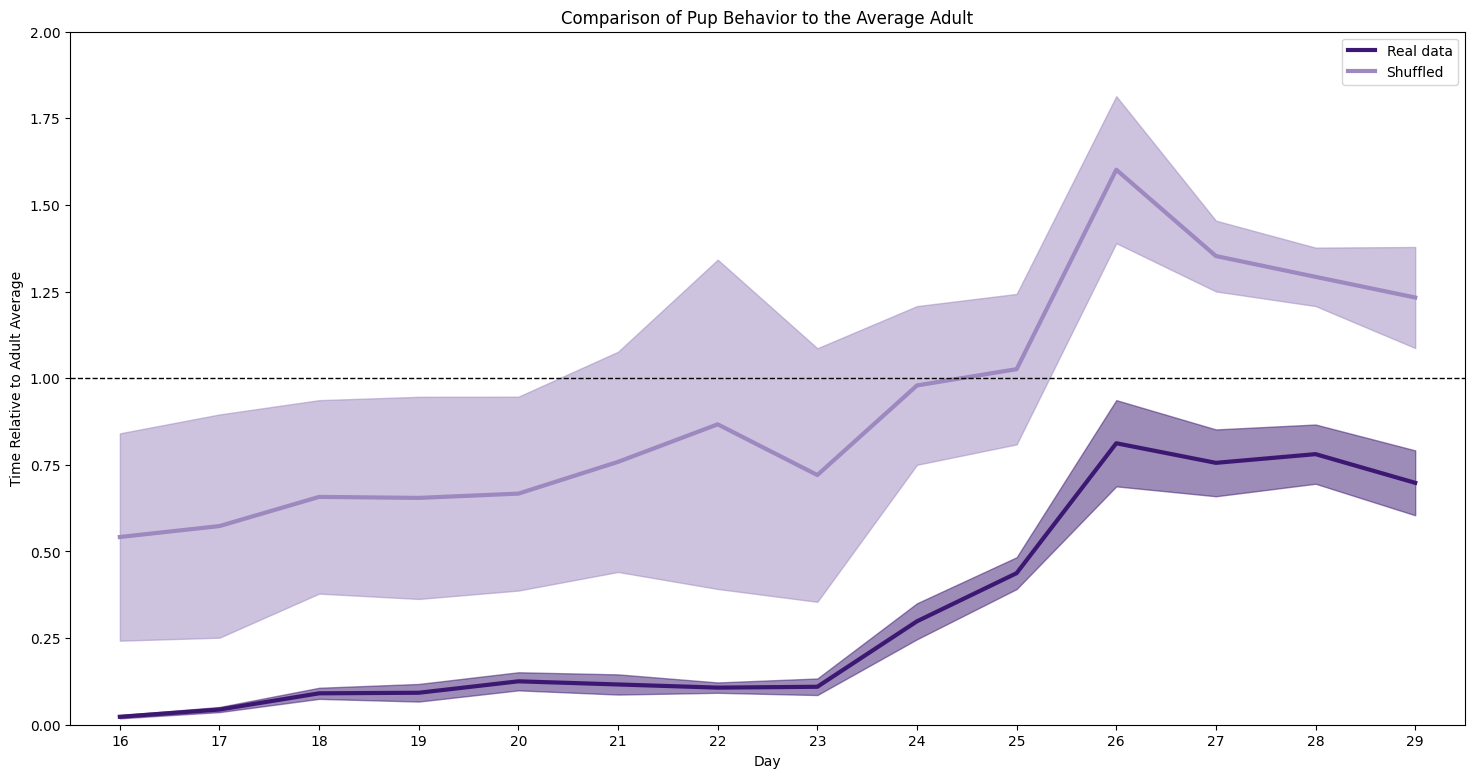

In [152]:
plt.figure(figsize = (18,9))

days = np.arange(16,30)

plt.plot(days, mean, color = '#3d1872', linewidth = 3)
plt.plot(days, shuffled_mean, color = '#9d88bf', linewidth = 3)

plt.fill_between(days, mean-sem, mean+sem, color = '#3d1872', alpha = 0.5)
plt.fill_between(days, shuffled_mean-shuffled_sem, shuffled_mean+shuffled_sem, color = '#9d88bf', alpha = 0.5)

plt.hlines(1, 15.5, 29.5, linestyles = 'dashed', color = 'black', linewidth = 1)

plt.xticks(days)

plt.ylim(0,2)
plt.xlim(15.5,29.5)

plt.ylabel('Time Relative to Adult Average')
plt.xlabel('Day')

plt.title('Comparison of Pup Behavior to the Average Adult')

plt.legend(('Real data', 'Shuffled'))

plt.savefig('/Users/lisadiez/Downloads/water_shuffle_test.png')

In [145]:
food_c2 = np.load('/Users/lisadiez/Downloads/cohort2_foodhopper.npy')
food_c2_final = get_new_array(food_c2)

food_c3 = np.load('/Users/lisadiez/Downloads/cohort3_foodhopper.npy')
food_c3_final = get_new_array(food_c3)

food_c4 = np.load('/Users/lisadiez/Downloads/cohort4_foodhopper.npy')
food_c4_final = get_new_array(food_c4)

In [149]:
mean_food, std_food, sem_food = get_relative_arrays(food_c2_final, food_c3_final, food_c4_final)

In [150]:
shuffled_food_c2 = food_c2_final.copy()
np.random.shuffle(shuffled_food_c2)

shuffled_food_c3 = food_c3_final.copy()
np.random.shuffle(shuffled_food_c3)

shuffled_food_c4 = food_c4_final.copy()
np.random.shuffle(shuffled_food_c4)

shuffled_mean_food, shuffled_std_food, shuffled_sem_food = get_relative_arrays(shuffled_food_c2, shuffled_food_c3, shuffled_food_c4)

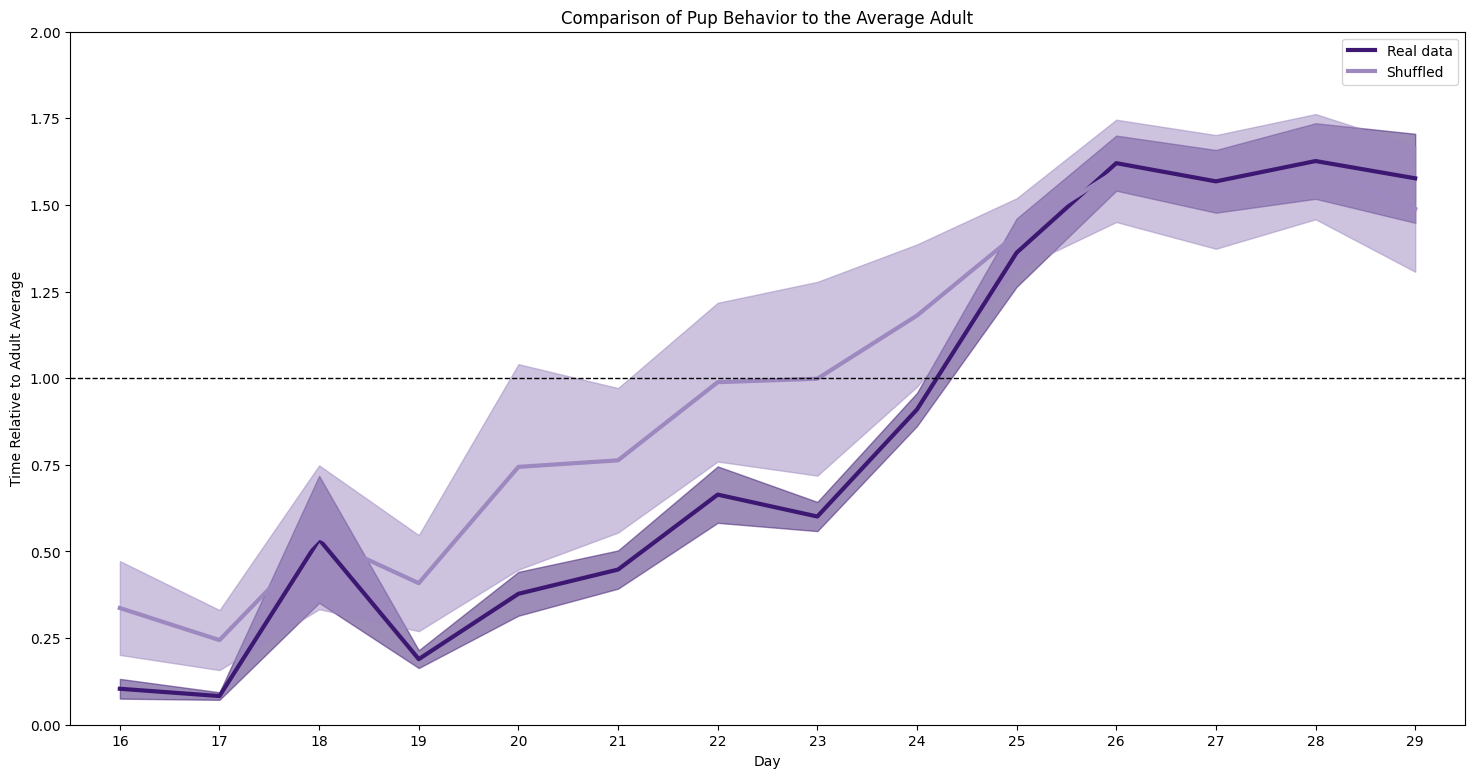

In [153]:
plt.figure(figsize = (18,9))

days = np.arange(16,30)

plt.plot(days, mean_food, color = '#3d1872', linewidth = 3)
plt.plot(days, shuffled_mean_food, color = '#9d88bf', linewidth = 3)

plt.fill_between(days, mean_food-sem_food, mean_food+sem_food, color = '#3d1872', alpha = 0.5)
plt.fill_between(days, shuffled_mean_food-shuffled_sem_food, shuffled_mean_food+shuffled_sem_food, color = '#9d88bf', alpha = 0.5)

plt.hlines(1, 15.5, 29.5, linestyles = 'dashed', color = 'black', linewidth = 1)

plt.xticks(days)

plt.ylim(0,2)
plt.xlim(15.5,29.5)

plt.ylabel('Time Relative to Adult Average')
plt.xlabel('Day')

plt.title('Comparison of Pup Behavior to the Average Adult')

plt.legend(('Real data', 'Shuffled'))

plt.savefig('/Users/lisadiez/Downloads/food_shuffle_test.png')